## Import thư viện

In [264]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sb
pd.set_option('display.max_columns', None)

## Đọc dataset

In [265]:
df = pd.read_csv('./data/data.csv')

c:\Users\anhbu\Desktop\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Các hàm xử lý

### Hàm xử lí và chuyển đổi đơn vị tiền tệ - Khôi

In [266]:
def currency_conv(old):
    """ Viết docstring mô tả hàm theo dạng input, output; docstring mô tả vai trò của class dùng để làm gì.
    input: một chuỗi thể đầu vào thể hiện đơn vị tiền tệ cần đổi
    output: số tiền khi đã chuyển ra $
    """
    if old!=None and old!="":
        s = str(old).replace('(estimated)', '').replace(',', '').replace(' ', '').replace('.', '')
        if s.find('R$')!=-1: # Đô la Brazil 
            return float(s.replace('R$', ''))*0.18

        elif s.find('CA$')!=-1: # Đô Canada
            return float(s.replace('CA$', ''))*0.808127

        elif s.find('A$')!=-1: # Đô úc
            return float(s.replace('A$', ''))*7.30

        elif s.find('MX$')!=-1: # Đồng Mexican Peso
            return float(s.replace('MX$', ''))*0.04938

        elif s.find('NZ$')!=-1: # New Zealand
            return float(s.replace('NZ$', ''))*0.71494

        elif s.find('HK$')!=-1: # Hong Kong Dolar
            return float(s.replace('HK$', ''))*0.12866

        elif s.find('NT$')!=-1: # Tân đài tệ
            return float(s.replace('NT$', ''))*0.036

        elif s.find('€')!=-1: # Đồng Euro
            return float(s.replace('€', ''))*1.16

        elif s.find('₹')!=-1: # Rupee Ấn Độ
            return float(s.replace('₹', ''))*0.013
        
        elif s.find('$')!=-1: # Đô la Mỹ
            return float(s.replace('$', ''))*1

        elif s.find('£')!=-1: # Bảng anh
            return float(s.replace('£', ''))*1.38

        elif s.find('TRL')!=-1: # Lira Thổ nhĩ kỳ
            return float(s.replace('TRL', ''))*0.10

        elif s.find('NOK')!=-1: # Krone Nauy
            return float(s.replace('NOK', ''))*0.12

        elif s.find('CN¥')!=-1: # Chinese Yuan
            return float(s.replace('CN¥', ''))*0.15664

        elif s.find('RUR')!=-1: # Rúp Nga
            return float(s.replace('RUR', ''))*0.014
        
        elif s.find('DKK')!=-1: # Krone Đan Mạch
            return float(s.replace('DKK', ''))*0.16

        elif s.find('ZAR')!=-1: # Rand Nam Phi
            return float(s.replace('ZAR', ''))*0.067
        
        elif s.find('ARS')!=-1: # Peso Argentina
            return float(s.replace('ARS', ''))*0.010

        elif s.find('SEK')!=-1: # Krone THuỵ Điển
            return float(s.replace('SEK', ''))*0.12

        elif s.find('₩')!=-1: # Won Hàn
            return float(s.replace('₩', ''))*0.00085

        elif s.find('CZK')!=-1: # Koruna Séc
            return float(s.replace('CZK', ''))*0.045

        elif s.find('SGD')!=-1: # Đô la Singapore
            return float(s.replace('SGD', ''))*0.74

        elif s.find('HUF')!=-1: # Forint Hungary
            return float(s.replace('HUF', ''))*0.0032

        elif s.find('PLN')!=-1: # Zloty Balan
            return float(s.replace('PLN', ''))*0.25

        elif s.find('UAH')!=-1: # Hryvnia Ukraina
            return float(s.replace('UAH', ''))*0.038

        elif s.find('EGP')!=-1: # Bảng Ai Cập
            return float(s.replace('EGP', ''))*0.064

        elif s.find('THB')!=-1: # Bạt Thái
            return float(s.replace('THB', ''))*0.030

        elif s.find('¥')!=-1: # yên nhật
            return float(s.replace('¥', ''))*0.0088

        elif s.find('₱')!=-1: # Peso Philipine
            return float(s.replace('₱', ''))*0.019708

        elif s.find('MYR')!=-1: # Ringit Malaysia
            return float(s.replace('MYR', ''))*0.24
            
        elif s.find('VEB')!=-1: # Venezuelan Bolívar
            return float(s.replace('VEB', ''))*0.000117802

        elif s.find('PKR')!=-1: # Rupe Pakistan
            return float(s.replace('PKR', ''))*0.00577

        elif s.find('CHF')!=-1: # Franc Thuỵ Sĩ
            return float(s.replace('CHF', ''))*1.09

        elif s.find('ISK')!=-1: # Krona Iceland 
            return float(s.replace('ISK', ''))*0.0078

        elif s.find('COP')!=-1: # Peso Columbia
            return float(s.replace('COP', ''))*0.00026

        elif s.find('IRR')!=-1: # Rian Iran
            return float(s.replace('IRR', ''))*0.000024

        elif s.find('DOP')!=-1: # Peso Dominica
            return float(s.replace('DOP', ''))*0.018

        elif s.find('AED')!=-1: # Dirham Các tiểu vương quốc Ả Rập thống nhất
            return float(s.replace('AED', ''))*0.27
            
        elif s.find('RON')!=-1: # Leu Romania
            return float(s.replace('RON', ''))*0.24

        elif s.find('NGN')!=-1: # Naira Nigeria
            return float(s.replace('NGN', ''))*0.0024

        elif s.find('KZT')!=-1: # Tenge Kazakhstan
            return float(s.replace('KZT', ''))*0.0024

        elif s.find('CLP')!=-1: # Peso Chile
            return float(s.replace('CLP', ''))*0.0012

        elif s.find('₪')!=-1: # Israeli Shekel
            return float(s.replace('₪', ''))*0.3118211

        elif s.find('HRK')!=-1: # Kuna Croatia
            return float(s.replace('HRK', ''))*0.067

        elif s.find('IDR')!=-1: # Rupiah Indonesia
            return float(s.replace('IDR', ''))*0.000070

        elif s.find('LVL')!=-1: # Latvian Lat
            return float(s.replace('LVL', ''))*1.65496

        elif s.find('ITL')!=-1: # Italian Lira
            return float(s.replace('ITL', ''))*0.00060143 

        elif s.find('NPR')!=-1: # Rupee Nepal
            return float(s.replace('NPR', ''))*0.0084

        elif s.find('BDT')!=-1: # Taka Bangladesh
            return float(s.replace('BDT', ''))*0.012

        elif s.find('SAR')!=-1: # Riyal Ả Rập Xê Út
            return float(s.replace('SAR', ''))*0.27

        elif s.find('AMD')!=-1: # Dram Armenia 
            return float(s.replace('AMD', ''))*0.0021
            
        elif s.find('FRF')!=-1: # French Franc
            return float(s.replace('FRF', ''))*0.177239

        elif s.find('MVR')!=-1: # Rufiyaa Maldives
            return float(s.replace('MVR', ''))*0.065

        elif s.find('EEK')!=-1: #  Estonian Kroon
            return float(s.replace('EEK', ''))*0.074409311

        elif s.find('BGL')!=-1: # Lev Bulgaria
            return float(s.replace('BGL', ''))*0.60

        elif s.find('PEN')!=-1: # Nuevo Sol Peru
            return float(s.replace('PEN', ''))*0.25

        elif s.find('GEL')!=-1: # Lari Gruzia
            return float(s.replace('GEL', ''))*0.32

        elif s.find('LTL')!=-1: # Lithuanian Litas
            return float(s.replace('LTL', ''))*0.337285
        else: return None
        # return ''.join(i for i in s if not i.isdigit()).lstrip().rsplit()[0]
    else:
        return None

### Hàm xử lý và phân loại loại chứng chỉ - Khôi

In [267]:
def certification_conv(old):
    """ Viết docstring mô tả hàm theo dạng input, output; docstring mô tả vai trò của class dùng để làm gì.
    Tại liệu tham khảo
    https://rating-system.fandom.com/wiki/Vietnam_Movie_Rating_System
    https://en.wikipedia.org/wiki/TV_Parental_Guidelines
    https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system
    https://en.wikipedia.org/wiki/Hong_Kong_motion_picture_rating_system
    """

    if (str(old).find('Rated R ')!=-1 or 
        str(old).find('R ')!=-1 or 
        str(old)=='R'):
        return 'C16'

    elif (str(old).find('PG ')!=-1 or 
        str(old)==('G')!=-1 or 
        str(old)=='PG' or 
        str(old)=='TV-G' or 
        str(old)=='TV-Y' or 
        str(old)=='TV-PG' or 
        str(old).find('TV-Y7')!=-1 or 
        str(old)=='I' or 
        str(old)=='Approved'):
        return 'P'

    elif (str(old).find('PG-13')!=-1 or 
        str(old)=='TV-14' or 
        str(old)=='II' or 
        str(old)=='IIA' or 
        str(old)=='IIB'):
        return 'C13'

    elif (str(old).find('NC-17 ')!=-1 or 
        str(old)=='TV-MA' or 
        str(old)=='MA-17' or 
        str(old)=='M' or 
        str(old)=='III' or 
        str(old)=='(Banned)'):
        return 'C18'

    elif (str(old)=='Not Rated'):
        return 'Unrated'

    else:
        return None

### Hàm tách năm - Khôi

In [268]:
def get_year(old):
    """ Viết docstring mô tả hàm theo dạng input, output; docstring mô tả vai trò của class dùng để làm gì.
    """
    return None

### Hàm chuyển đổi chuỗi thời gian về dạng phút - Thu Hà

In [269]:
def to_minutes(time):
    """ Chuyển đổi chuỗi thời gian thành dạng phút 
    Input: Chuỗi thời gian. Ví dụ '2h 28min'
    Output: Thời gian dưới dạng phút. Ví dụ 60, 120
    """
    if str(time).find('h')!=-1 or str(time).find('min')!=-1:
      time = str(time)
      time = time.replace("h","")
      time = time.replace("min","")
      times = time.split()
      times = np.array(times)
      times = times.astype("float")
      minutes=0
      if len(times)==1:
        if(times[0]>3):
          minutes=times[0]
        else: minutes=times[0]*60
      else: minutes = times[0]*60+times[1]
      return minutes
    else:
      return None

### Hàm xử lý votes - Thu Hà

In [270]:
def pp_vote(votes):
    """ Đổi đơn vị thành nghìn người
    Input: Chuỗi hoặc số thể hiện số lượng vote. Ví dụ '2K', '1231', 12312
    Output: Số lượng người vote đơn vị nghìn người. Ví dụ 2, 1.231, 12.312
    """
    if votes != None:
        votes= str(votes)
        num_vote=0
        if(votes.count("M")==1):
            votes = votes.replace("M","")
            vote= float(votes)
            num_vote = vote*1000
        elif(votes.count("K")==1):
            votes = votes.replace("K","")
            vote= float(votes)
            num_vote = vote
        else: 
            vote= float(votes)
            num_vote = vote*1/1000
        return float(str(num_vote))
    else:
        return None

### Hàm xử lý reviews - Thu Hà

In [271]:
def pp_review(reviews):
    """ Đổi số lượng đánh giá thành đơn vị nghìn người
    Input: Chuỗi hoặc số thể hiện số lượt đánh giá. Ví dụ '2k', 123, '12312'
    Output: Số lượng đánh giá (đơn vị người). Ví dụ 2000, 123, 12312
    """
    reviews= str(reviews)
    num_review=0
    if(reviews.count("M")==1):
      reviews = reviews.replace("M","")
      review= float(reviews)
      num_review = review*1000000
    elif(reviews.count("K")==1):
      reviews = reviews.replace("K","")
      review= float(reviews)
      num_review = review*1000
    else: 
      review= float(reviews)
      num_review = review*1000
    return float(str(num_review))

### Hàm xử lý tỉ lệ khung hình - Khôi

In [272]:
def pp_ratio(aspect_ratio):
    """ 
    """
    return None

### Hàm xử lý score - Thu Hà

In [273]:
def pp_score(score):
    """ Chuyển score về dạng số
    Input: Chuỗi thể hiện điểm trên thang 10. Ví dụ '5/10', '5.5/10'
    Output: Số điểm tương ứng. Ví dụ 5, 5.5
    """
    if score!=None:
        return float(str(score).replace("/10",""))
    else:
        return None

## Tiền xử lý dataset

In [274]:
df.isnull().mean() * 100 # Phần trăm dữ liệu khuyết


title                    0.000000
casts                    7.546906
directors                5.661927
writers                 16.526990
genres                   5.715235
certificate             79.516040
release_date             6.972761
countries_of_origin      2.643514
languages                4.733857
production_companies    26.720906
gross_worldwide         80.022022
budget                  69.781790
runtime                 21.175206
color                    9.452858
sound_mix               85.974954
aspect_ratio            69.690905
score                   37.595582
votes                   37.595582
user_reviews            52.498886
critic_reviews          71.432566
metascore               94.362542
dtype: float64

In [275]:
# drop các dư thừa 'casts', 'directors', 'writers', 'sound_mix' , 'production_companies'
df.drop(columns=['casts', 'directors', 'writers', 'sound_mix' , 'production_companies'], inplace=True)

In [276]:
# drop các datapoint bị khuyết doanh thu
df.dropna(subset=['gross_worldwide'], inplace=True)

# drop các datapoint trùng lặp khuyết doanh thu
df.drop_duplicates(inplace=True)

In [277]:
df.isnull().mean() * 100 # Phần trăm dữ liệu khuyết sau khi đã drop các cột khuyết doanh thu

title                   0.000000
genres                  7.974826
certificate            57.954597
release_date            0.359631
countries_of_origin     5.331535
languages               6.194650
gross_worldwide         0.000000
budget                 71.701506
runtime                10.159586
color                   9.314453
aspect_ratio           48.545741
score                   8.770510
votes                   8.770510
user_reviews           17.410654
critic_reviews         34.619016
metascore              76.754327
dtype: float64

In [278]:
#apply các hàm xử lý
df['gross_worldwide'] = df['gross_worldwide'].apply(currency_conv)
df['budget'] = df['budget'].apply(currency_conv)
df['certificate'] = df['certificate'].apply(certification_conv)
df['score'] = df['score'].apply(pp_score)
df['votes'] = df['votes'].apply(pp_vote)
df['user_reviews'] = df['user_reviews'].apply(pp_review)
df['critic_reviews'] = df['critic_reviews'].apply(pp_review)
df['runtime'] = df['runtime'].apply(to_minutes)

In [279]:
# a = df.genres
# genres_list = []
# for item in a:
#     genres_list = genres_list + str(item).split(',')

# try:
#     while True:
#         genres_list.remove('')
# except:
#     pass

# genres_list = pd.Series(genres_list)

In [280]:
df.shape

(22245, 16)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22245 entries, 0 to 114429
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                22245 non-null  object 
 1   genres               20471 non-null  object 
 2   certificate          8885 non-null   object 
 3   release_date         22165 non-null  object 
 4   countries_of_origin  21059 non-null  object 
 5   languages            20867 non-null  object 
 6   gross_worldwide      22245 non-null  float64
 7   budget               6292 non-null   float64
 8   runtime              19985 non-null  float64
 9   color                20173 non-null  object 
 10  aspect_ratio         11446 non-null  object 
 11  score                20294 non-null  float64
 12  votes                20294 non-null  float64
 13  user_reviews         18372 non-null  float64
 14  critic_reviews       14544 non-null  float64
 15  metascore            5171 non-null 

<AxesSubplot:>

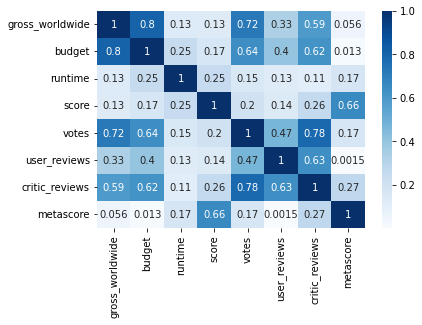

In [282]:
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

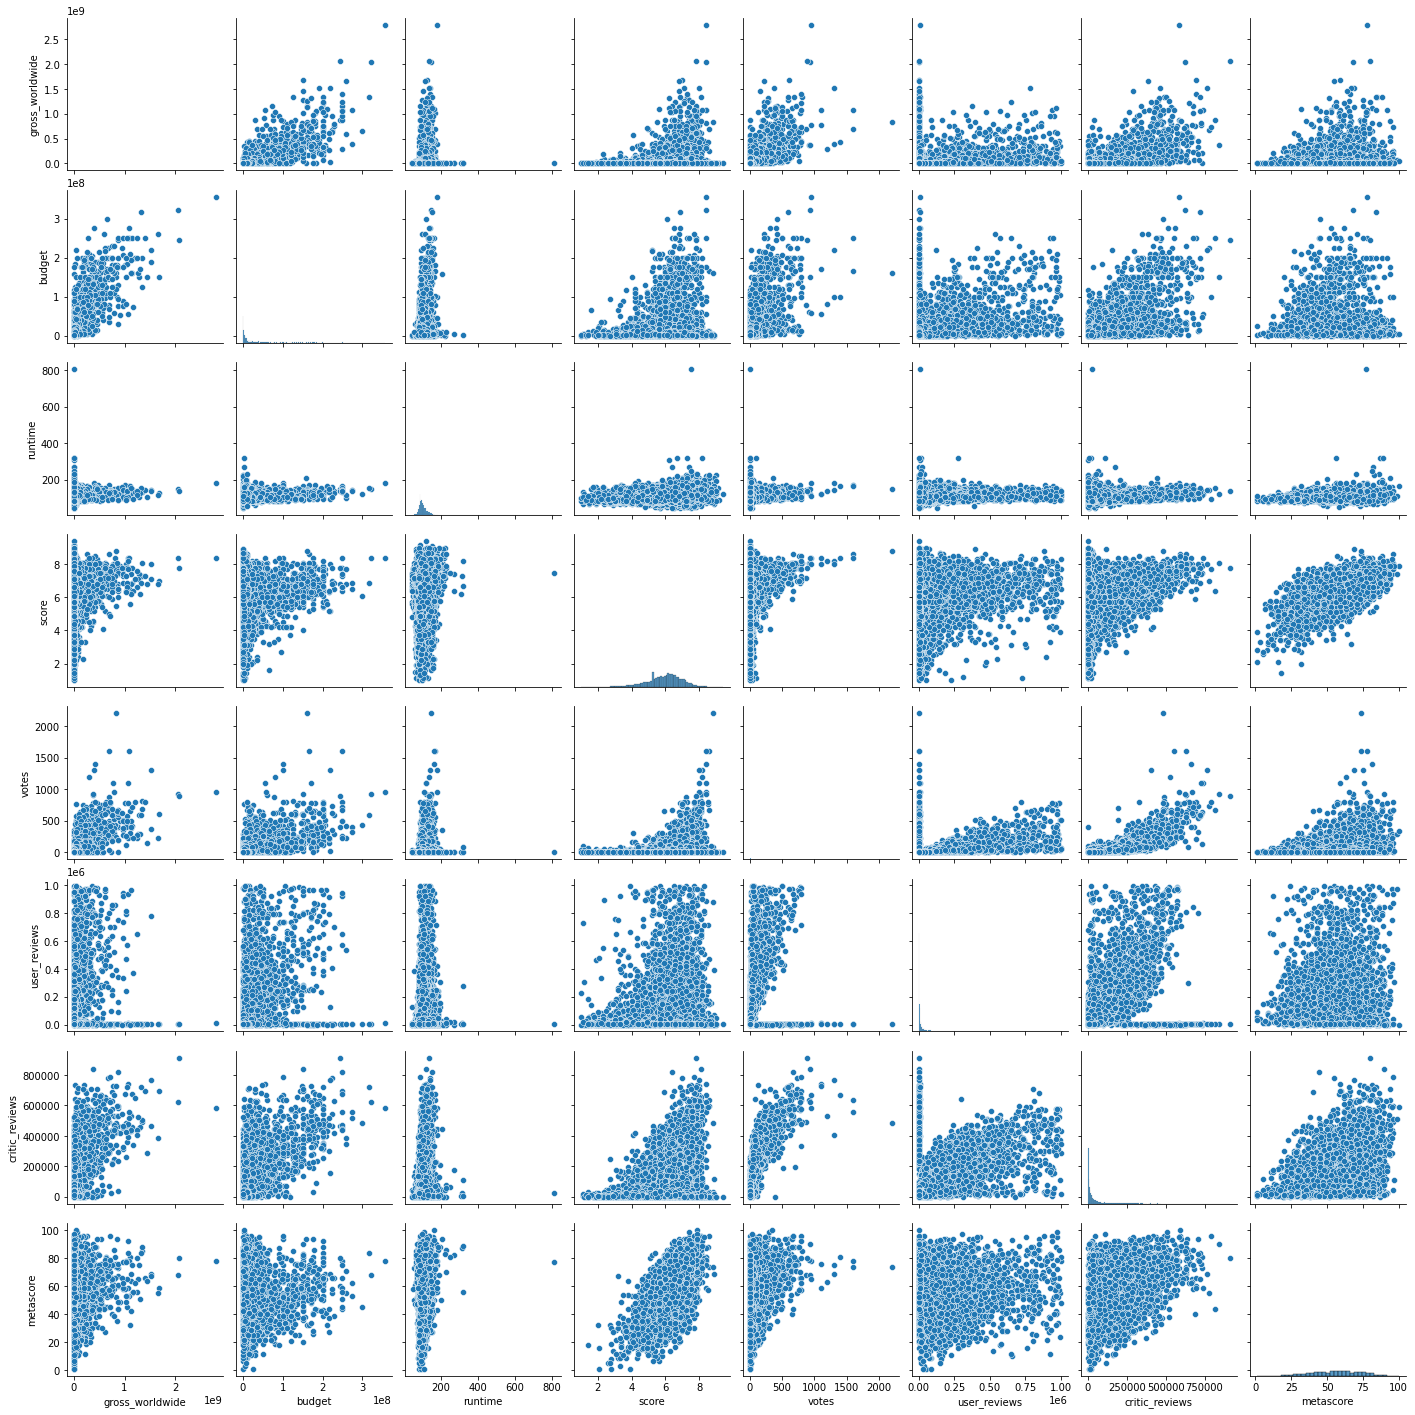

In [286]:
sb.pairplot(df)

## Lưu dataset

In [283]:
df.to_csv('./data/data_preprocessed.csv', index=False, encoding='utf-8-sig')